In [104]:
import pandas as pd
import pandas_datareader as pddata
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from math import * 

In [120]:
GBP_rate = pd.read_csv("GBPRate.csv")
USD_rate = pd.read_csv("USDRate.csv")
GBP_rate['DATE']=pd.to_datetime(GBP_rate['DATE'])
GBP_rate = GBP_rate.set_index('DATE')
GBP_rate = GBP_rate['2015-11-13':'2020-11-13']
USD_rate['DATE']=pd.to_datetime(USD_rate['DATE'])
USD_rate = USD_rate.set_index('DATE')
USD_rate = USD_rate['2015-11-13':'2020-11-13']
rate_a = np.array([USD_rate['USD1MTD156N'],GBP_rate['GBP1MTD156N']]).reshape(1306,2)
df_rate = pd.DataFrame(rate_a,columns = ['USD','GBP'],index = USD_rate.index)
df_rate = df_rate[df_rate['USD']!='.']
df_rate = df_rate[df_rate['GBP']!='.']
df_rate = df_rate.astype('float')

In [121]:
sdate = '2015-11-13'
edate = '2020-11-13'
df_FX = web.DataReader("GBPUSD=X", 'yahoo',sdate,edate)['Adj Close']
df_FX_30 = df_FX.shift(-30)
dt = 30/365
Z_real = np.log(df_FX_30.values/df_FX.values)/dt
Z_pred = df_rate['USD']-df_rate['GBP']

In [136]:
df_Z = pd.DataFrame(Z_real,columns=['Z_real'],index = df_FX_30.index)
df_Z['pred'] = Z_pred
df_Z_nan = df_Z.dropna()

# I suspect there is something wrong with my data processing up to here - according to the formula I expect Z_real and pred would be similar, however they are not. Anything wrong with fetching data from yahoo? or I misunderstood the question somewhere? 

In [137]:
df_Z_nan 

,Z_real,pred
Date,,
2015-11-13,-0.258582,-0.00200
2015-11-16,-0.230719,-0.00425
2015-11-17,-0.251382,0.00175
2015-11-18,-0.322164,-0.00400
2015-11-19,-0.340067,-0.00125
...,...,...
2020-09-24,0.359289,-0.00037
2020-09-28,0.276751,-0.00163
2020-09-29,0.367904,0.00212


<AxesSubplot:xlabel='Date'>

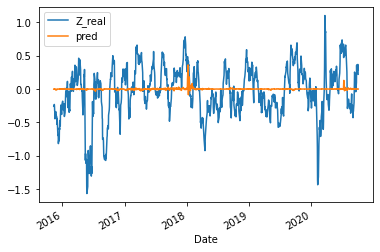

In [138]:
df_Z_nan.plot()